Coursework 2 - 13423803

1.	Show descriptive statistics of the stocks 

In [1]:
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.api as sm
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('Data.csv', index_col='Date')
data = data.sort_index(ascending=True)
data

,BCS,ULVR,Rf,Rm,SMB,HML,UMD
Date,,,,,,,
2000m12,15.174000,576.348145,NaN,NaN,NaN,NaN,NaN
2001m1,15.265091,573.459778,0.004468,0.016129,0.037804,0.039162,-0.055891
2001m10,14.773508,564.751282,0.003364,0.032414,0.057838,0.016091,-0.066847
2001m11,14.821559,640.503845,0.003088,0.043625,0.059140,0.049173,-0.093423
2001m12,16.160784,643.305481,0.003138,0.004510,0.011561,-0.006694,0.028714
...,...,...,...,...,...,...,...
2017m5,9.496508,3742.147217,0.000050,0.043625,-0.018531,-0.014771,-0.000679
2017m6,9.337791,3616.798096,0.000108,-0.024690,0.008212,0.014697,0.014046
2017m7,9.461237,3761.732178,0.000108,0.011668,0.016888,0.046766,0.073621


Descriptive Statistics for BCS & ULVR

In [3]:
data[['BCS', 'ULVR']].describe()

,BCS,ULVR
count,205.000000,205.000000
mean,15.782108,1406.469817
std,7.063559,849.919689
min,3.504107,554.526550
25%,11.466057,696.267639
50%,13.961012,1099.918091
75%,19.119701,1973.155518
max,35.634449,3933.649414


2.	Calculate daily stocks’ interest returns 
3.	Build a dataframe of return interests of two stocks with Rf, Rm, SML, HML, UMD. 

In [4]:
data[['BCS', 'ULVR']] = data[['BCS', 'ULVR']].pct_change()
data = data.dropna()
data

,BCS,ULVR,Rf,Rm,SMB,HML,UMD
Date,,,,,,,
2001m1,0.006003,-0.005011,0.004468,0.016129,0.037804,0.039162,-0.055891
2001m10,-0.032203,-0.015186,0.003364,0.032414,0.057838,0.016091,-0.066847
2001m11,0.003253,0.134134,0.003088,0.043625,0.059140,0.049173,-0.093423
2001m12,0.090357,0.004374,0.003138,0.004510,0.011561,-0.006694,0.028714
2001m2,-0.111666,-0.106845,0.004385,-0.050766,0.025866,0.038198,0.132797
...,...,...,...,...,...,...,...
2017m5,-0.003700,0.090508,0.000050,0.043625,-0.018531,-0.014771,-0.000679
2017m6,-0.016713,-0.033497,0.000108,-0.024690,0.008212,0.014697,0.014046
2017m7,0.013220,0.040072,0.000108,0.011668,0.016888,0.046766,0.073621


Adding new data for BRP, URP, and MP

In [5]:
data["BRP"] = data.loc[:, ('BCS')] - data.loc[:, ('Rf')] # BRP is BCS risk premium (BCS Return - Rf)
data["URP"] = data.loc[:, ('ULVR')] - data.loc[:, ('Rf')] # URP is ULVR risk premium (ULVR Return - Rf)
data["MP"] = data.loc[:, ('Rm')] - data.loc[:, ('Rf')] # MP is Market Premium (Rm - Rf)
data

C:\Users\user\AppData\Local\Temp\ipykernel_3988\604869514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["BRP"] = data.loc[:, ('BCS')] - data.loc[:, ('Rf')] # BRP is BCS risk premium (BCS Return - Rf)
C:\Users\user\AppData\Local\Temp\ipykernel_3988\604869514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["URP"] = data.loc[:, ('ULVR')] - data.loc[:, ('Rf')] # URP is ULVR risk premium (ULVR Return - Rf)
C:\Users\user\AppData\Local\Temp\ipykernel_3988\604869514.py:3: SettingWithCopyWarning:

,BCS,ULVR,Rf,Rm,SMB,HML,UMD,BRP,URP,MP
Date,,,,,,,,,,
2001m1,0.006003,-0.005011,0.004468,0.016129,0.037804,0.039162,-0.055891,0.001535,-0.009480,0.011660
2001m10,-0.032203,-0.015186,0.003364,0.032414,0.057838,0.016091,-0.066847,-0.035567,-0.018550,0.029050
2001m11,0.003253,0.134134,0.003088,0.043625,0.059140,0.049173,-0.093423,0.000164,0.131046,0.040537
2001m12,0.090357,0.004374,0.003138,0.004510,0.011561,-0.006694,0.028714,0.087218,0.001236,0.001372
2001m2,-0.111666,-0.106845,0.004385,-0.050766,0.025866,0.038198,0.132797,-0.116050,-0.111230,-0.055151
...,...,...,...,...,...,...,...,...,...,...
2017m5,-0.003700,0.090508,0.000050,0.043625,-0.018531,-0.014771,-0.000679,-0.003750,0.090458,0.043575
2017m6,-0.016713,-0.033497,0.000108,-0.024690,0.008212,0.014697,0.014046,-0.016822,-0.033605,-0.024798
2017m7,0.013220,0.040072,0.000108,0.011668,0.016888,0.046766,0.073621,0.013112,0.039964,0.011559


4.	Run CAPM model for BCS and ULVR

BCS with CAPM Model

In [6]:
# Selecting the variables for regression analysis
predictors = ['MP']
outcome = 'BRP'

In [7]:
# Splitting the data
X = pd.get_dummies(data[predictors], drop_first=True)
y = data[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [8]:
# Fitting the data for regression
returnbcs = LinearRegression()
returnbcs.fit(train_X, train_y)

LinearRegression()

In [9]:
# Printing the coefficients
print('intercept ', returnbcs.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': returnbcs.coef_}))

intercept  0.036687816460943004
  Predictor  coefficient
0        MP      1.85606


In [10]:
# Printing the performance measures
pred_y = returnbcs.predict(train_X)
print('R2 : ',r2_score(train_y,pred_y))

R2 :  0.03784201942962018


In [11]:
import statsmodels.api as sm

#second way to create linear regression
#add constant to predictor variables
train_X1 = sm.add_constant(train_X)

#fit linear regression model
returnbcs1 = sm.OLS(train_y, train_X1).fit()

#view model summary
print(returnbcs1.summary())

                            OLS Regression Results                            
Dep. Variable:                    BRP   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     4.720
Date:                Mon, 10 Apr 2023   Prob (F-statistic):             0.0318
Time:                        23:38:16   Log-Likelihood:                -51.016
No. Observations:                 122   AIC:                             106.0
Df Residuals:                     120   BIC:                             111.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0367      0.034      1.093      0.2

In [12]:
# Predicting the data 
returnbcs2 = returnbcs.predict(valid_X)

result = pd.DataFrame({'Predicted': returnbcs2, 'Actual': valid_y,
                       'Residual': valid_y - returnbcs2})
print(result.head(10))
print('adjusted r2 : ',r2_score(valid_y,returnbcs2))

         Predicted    Actual  Residual
Date                                  
2011m5    0.022568 -0.035079 -0.057647
2017m9    0.028384  0.053513  0.025129
2002m4    0.001733  0.154362  0.152629
2015m5    0.061015  0.049807 -0.011208
2017m2    0.094315  0.012516 -0.081798
2003m5    0.112857  0.026826 -0.086031
2003m2    0.080121 -0.401631 -0.481752
2004m2    0.083654 -0.229931 -0.313586
2008m9   -0.215849 -0.005841  0.210008
2004m11   0.074166  0.050948 -0.023218
adjusted r2 :  0.0889653484485764


1.0


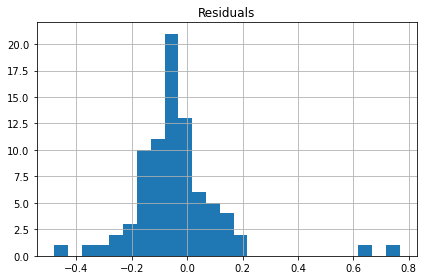

In [13]:
# Calculating the residuals
all_residuals = valid_y - returnbcs2
print(len(all_residuals[(all_residuals > -1445) & (all_residuals < 1445)]) / len(all_residuals))
ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.tight_layout()
plt.show()

ULVR with CAPM Model

In [14]:
# Selecting the variables for regression analysis
predictors = ['MP']
outcome = 'URP'

In [15]:
# Splitting the data
X = pd.get_dummies(data[predictors], drop_first=True)
y = data[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [16]:
# Fitting the data for regression
returnulvr = LinearRegression()
returnulvr.fit(train_X, train_y)

LinearRegression()

In [17]:
# Printing the coefficients
print('intercept ', returnulvr.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': returnulvr.coef_}))

intercept  0.008239702107775903
  Predictor  coefficient
0        MP     0.777069


In [18]:
# Printing the performance measures
pred_y = returnulvr.predict(train_X)
print('R2 : ',r2_score(train_y,pred_y))

R2 :  0.12223931056840243


In [19]:
import statsmodels.api as sm

#second way to create linear regression
#add constant to predictor variables
train_X1 = sm.add_constant(train_X)

#fit linear regression model
returnulvr1 = sm.OLS(train_y, train_X1).fit()

#view model summary
print(returnulvr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    URP   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     16.71
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           7.90e-05
Time:                        23:38:17   Log-Likelihood:                 132.33
No. Observations:                 122   AIC:                            -260.7
Df Residuals:                     120   BIC:                            -255.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0082      0.007      1.103      0.2

In [20]:
# Predicting the data
returnulvr2 = returnulvr.predict(valid_X)

result = pd.DataFrame({'Predicted': returnulvr2, 'Actual': valid_y,
                       'Residual': valid_y - returnulvr2})
print(result.head(10))
print('adjusted r2 : ',r2_score(valid_y,returnulvr2))

         Predicted    Actual  Residual
Date                                  
2011m5    0.002328  0.014500  0.012171
2017m9    0.004763 -0.037319 -0.042082
2002m4   -0.006395  0.114182  0.120576
2015m5    0.018425  0.014355 -0.004070
2017m2    0.032366 -0.102425 -0.134791
2003m5    0.040129 -0.118243 -0.158372
2003m2    0.026424  0.050894  0.024470
2004m2    0.027903  0.056988  0.029085
2008m9   -0.097489  0.026785  0.124274
2004m11   0.023931  0.039782  0.015852
adjusted r2 :  -0.08054655523579735


1.0


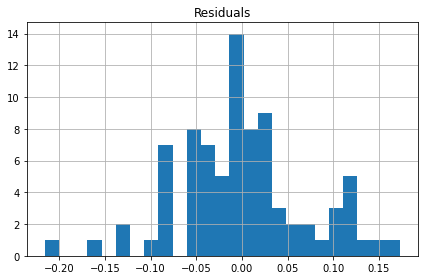

In [21]:
# Calculating the residuals
all_residuals = valid_y - returnulvr2
print(len(all_residuals[(all_residuals > -1445) & (all_residuals < 1445)]) / len(all_residuals))
ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.tight_layout()
plt.show()

Conclusion: The Stock that would perform better in Upward Market is BCS because the BETA is higher (more volatile) and the Stock that would perform better in down-ward market is ULVR because the BETA is lower (less volatile).

5.	Run F&F model for BCS and ULVR

BCS with F&F Model

In [22]:
# Selecting the variables for regression analysis
predictors = ['MP', 'SMB', 'HML', 'UMD']
outcome = 'BRP'

In [23]:
# Splitting the data
X = pd.get_dummies(data[predictors], drop_first=True)
y = data[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [24]:
# Fitting the data for regression
returnbcss = LinearRegression()
returnbcss.fit(train_X, train_y)

LinearRegression()

In [25]:
# Printing the coefficients
print('intercept ', returnbcss.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': returnbcss.coef_}))

intercept  0.021816007694864935
  Predictor  coefficient
0        MP     1.897682
1       SMB     1.977302
2       HML    -0.073861
3       UMD     0.462017


In [26]:
# Printing the performance measures
pred_y = returnbcss.predict(train_X)
print('R2 : ',r2_score(train_y,pred_y))

R2 :  0.06162148649510246


In [27]:
import statsmodels.api as sm

#second way to create linear regression
#add constant to predictor variables
train_X1 = sm.add_constant(train_X)

#fit linear regression model
returnbcss1 = sm.OLS(train_y, train_X1).fit()

#view model summary
print(returnbcss1.summary())

                            OLS Regression Results                            
Dep. Variable:                    BRP   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.921
Date:                Mon, 10 Apr 2023   Prob (F-statistic):              0.112
Time:                        23:38:18   Log-Likelihood:                -49.490
No. Observations:                 122   AIC:                             109.0
Df Residuals:                     117   BIC:                             123.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0218      0.037      0.592      0.5

ULVR with F&F Model

In [29]:
# Selecting the variables for regression analysis
predictors = ['MP', 'SMB', 'HML', 'UMD']
outcome = 'URP'

In [30]:
# Splitting the data
X = pd.get_dummies(data[predictors], drop_first=True)
y = data[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [31]:
# Fitting the data for regression
returnulvrs = LinearRegression()
returnulvrs.fit(train_X, train_y)

LinearRegression()

In [32]:
# Print the coefficients
print('intercept ', returnulvrs.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': returnulvrs.coef_}))

intercept  0.0021453271532692574
  Predictor  coefficient
0        MP     0.970985
1       SMB    -0.328639
2       HML     0.128882
3       UMD     0.470442


In [33]:
# Printing the performance measures
pred_y = returnulvrs.predict(train_X)
print('R2 : ',r2_score(train_y,pred_y))

R2 :  0.19339158793860967


In [34]:
import statsmodels.api as sm

#second way to create linear regression
#add constant to predictor variables
train_X1 = sm.add_constant(train_X)

#fit linear regression model
returnulvrs1 = sm.OLS(train_y, train_X1).fit()

#view model summary
print(returnulvrs1.summary())

                            OLS Regression Results                            
Dep. Variable:                    URP   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     7.013
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           4.27e-05
Time:                        23:38:19   Log-Likelihood:                 137.49
No. Observations:                 122   AIC:                            -265.0
Df Residuals:                     117   BIC:                            -251.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.008      0.269      0.7

Base on the R-Squared of CAPM Model and F&F Model, it can be concluded that F&F Model perform better since it has higher value that CAPM Model. Therefore, for BCS and ULVR the better model is F&F Model. 

6.	Based on the better model of each stock, calculate the residual between predictions and real values of return interests.

Since the better model for both stock is F&F Model, below is the residual and histogram BCS and ULVR using F&F Model

In [36]:
# Predicting the data
returnbcss2 = returnbcss.predict(valid_X)

result = pd.DataFrame({'Predicted': returnbcss2, 'Actual': valid_y,
                       'Residual': valid_y - returnbcss2})
print(result.head(10))
print('adjusted r2 : ',r2_score(valid_y,returnbcss2))

         Predicted    Actual  Residual
Date                                  
2011m5    0.017282  0.014500 -0.002783
2017m9    0.051253 -0.037319 -0.088572
2002m4    0.117765  0.114182 -0.003583
2015m5    0.136233  0.014355 -0.121878
2017m2    0.042575 -0.102425 -0.145000
2003m5    0.184674 -0.118243 -0.302916
2003m2    0.032026  0.050894  0.018868
2004m2    0.087673  0.056988 -0.030685
2008m9   -0.261658  0.026785  0.288443
2004m11   0.088411  0.039782 -0.048628
adjusted r2 :  -2.148737129265614


1.0


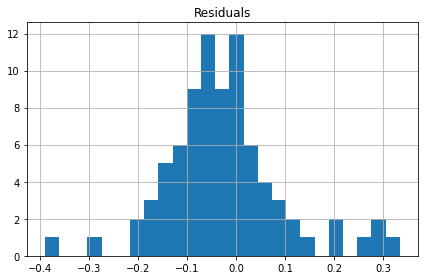

In [37]:
# Calculating the residuals
all_residuals = valid_y - returnbcss2
print(len(all_residuals[(all_residuals > -1445) & (all_residuals < 1445)]) / len(all_residuals))
ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.tight_layout()
plt.show()

In [38]:
# Predicting the data
returnulvrs2 = returnulvrs.predict(valid_X)

result = pd.DataFrame({'Predicted': returnulvrs2, 'Actual': valid_y,
                       'Residual': valid_y - returnulvrs2})
print(result.head(10))
print('adjusted r2 : ',r2_score(valid_y,returnulvrs2))

         Predicted    Actual  Residual
Date                                  
2011m5   -0.020608  0.014500  0.035107
2017m9   -0.022186 -0.037319 -0.015133
2002m4   -0.001635  0.114182  0.115817
2015m5    0.011715  0.014355  0.002640
2017m2    0.020501 -0.102425 -0.122925
2003m5   -0.000583 -0.118243 -0.117660
2003m2    0.057582  0.050894 -0.006688
2004m2    0.038964  0.056988  0.018024
2008m9   -0.141931  0.026785  0.168716
2004m11   0.029345  0.039782  0.010438
adjusted r2 :  -0.20887636321519976


1.0


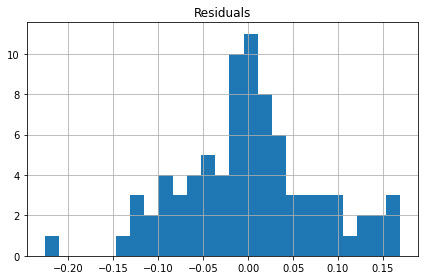

In [39]:
# Calculating the residuals
all_residuals = valid_y - returnulvrs2
print(len(all_residuals[(all_residuals > -1445) & (all_residuals < 1445)]) / len(all_residuals))
ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.tight_layout()
plt.show()